In [13]:
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

## **Business Understanding**   *** work in progress***

#### person wants to learn more, be creative, change the routine,
image have an app that recommends us recipes beased on the ingredients that we have.
therefore, i will need to build a classification model first and it is on that the project will focus on.
create a model that is accurate enough so that the recomendations could be efficients, assertives and effectives.
this project aims to find a high accurate multi classification model
is there any research that points to this use case being valuable?

what work or literature exists on the topic?

Is the business case geared to a user, a entrepreneurial venture or a business line proposal to a company? -this business case is to me as a investor/stakeholder

Food recognition is an emerging topic in the field of computer vision. The recent interest of the research community in this area is justified by the rise in popularity of food diary applications, where the users take note of their food intake for self-monitoring or to provide useful statistics to dietitians. However, manually annotating food intake can be a tedious task, thus explaining the need of a system that automatically recognizes food, and possibly its amount, from pictures acquired by mobile devices. In this work we propose an approach to food recognition which combines the strengths of different state-of-the-art classifiers, namely Convolutional Neural Networks, Extreme Learning Machines and Neural Trees. We show that the proposed architecture can achieve good results even with low computational power, as in the case of mobile devices.

##  **Data Understanding**

To split folders with files (e.g. images) into train, validation and test (dataset) folders, I used a Python module, <i>split_mode</i>. 
To only split into training, validation and test set, I set a tuple to 'ratio', i.e, '(.8, .1, .1)'.
To have a better understanding of the data, I plotted some training data.

In [1]:
import split_folders

input_folder = '../Food-Ingredients-Recognition/Data/ingredients/'
output_folder = '../Food-Ingredients-Recognition/Data/Split_Sets/'

# split_folders.ratio(input_folder, output=output_folder, seed=1337, ratio=(.8, .1, .1)) 


Copying files: 5526 files [00:22, 241.43 files/s]


In [2]:
input_path = '../Food-Ingredients-Recognition/Data/Split_Sets/'
train_dir = "../Food-Ingredients-Recognition/Data/Split_Sets/train/"
val_dir = "../Food-Ingredients-Recognition/Data/Split_Sets/val/"
test_dir = "../Food-Ingredients-Recognition/Data/Split_Sets/test/"

In [52]:
import os
meat_images = os.listdir(train_dir + "meat")
fruits_vegetables = os.listdir(train_dir + "fruits_vegetables")
grains = os.listdir(train_dir + "grains")

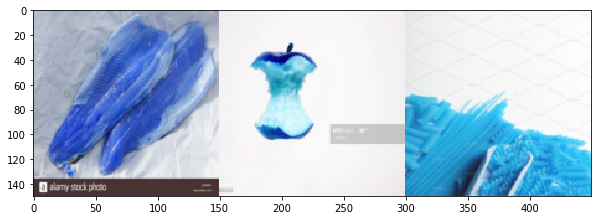

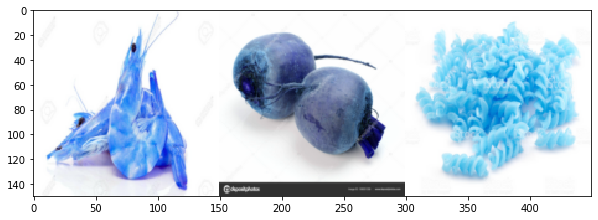

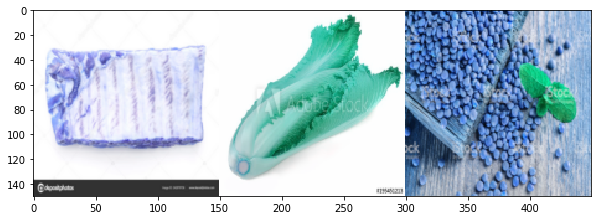

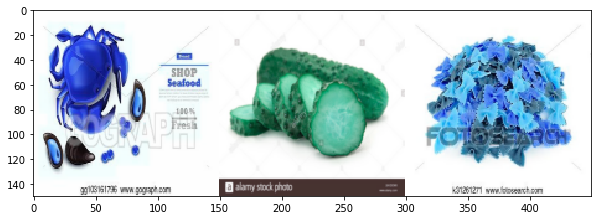

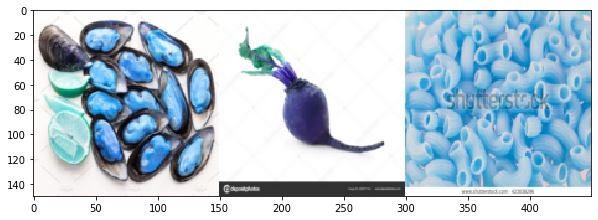

In [54]:
from skimage.transform import resize
import cv2
import skimage

def plotter(i):
    meat_prev = cv2.imread(train_dir+"meat/"+meat_images[i])
    meat_prev = skimage.transform.resize(meat_prev, (150, 150, 3))
    fruits_prev = cv2.imread(train_dir+"fruits_vegetables/"+fruits_vegetables[i])
    fruits_prev = skimage.transform.resize(fruits_prev, (150, 150, 3))# , mode = 'reflect')
    grains_prev = cv2.imread(train_dir+"grains/"+grains[i])
    grains_prev = skimage.transform.resize(grains_prev, (150, 150, 3))
    pair = np.concatenate((meat_prev, fruits_prev, grains_prev), axis=1)

    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(5,10):
    plotter(i)

# Data Preparation


Before the modeling, I defined as constants values, image dimensions and batch_size.


In [15]:
img_dims = 150
batch_size = 32

In [16]:
from keras.preprocessing.image import ImageDataGenerator

# Function for Data generation objects
# def process_data(img_dims, batch_size):
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=[0.5,1.0], horizontal_flip=True, rotation_range=90)
val_datagen = ImageDataGenerator(rescale=1./255)


Using TensorFlow backend.


In [64]:
train_g = train_datagen.flow_from_directory(directory=train_dir, target_size=(img_dims, img_dims), batch_size=batch_size,class_mode='categorical')
val_g = val_datagen.flow_from_directory(directory=val_dir, target_size=(img_dims, img_dims), batch_size=batch_size, class_mode='categorical')    

Found 4419 images belonging to 3 classes.
Found 551 images belonging to 3 classes.


# Modeling - baseline


In [20]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation

base = Sequential()

base.add(Conv2D(128, kernel_size=(3, 3), strides=1, activation='relu', padding='same', input_shape=(150, 150, 3)))
base.add(MaxPool2D(pool_size=(2,2),strides=2))

base.add(Conv2D(64, kernel_size=(3, 3), strides=1, activation='relu', padding='same'))
base.add(MaxPool2D(pool_size=(2,2),strides=2))

base.add(Conv2D(32, kernel_size=(3, 3), strides=1, activation='relu', padding='same'))
base.add(MaxPool2D(pool_size=(2,2),strides=2))

base.add(Conv2D(16, kernel_size=(3, 3), strides=1, activation='relu', padding='same'))
base.add(MaxPool2D(pool_size=(2,2),strides=2))


base.add(Flatten())
base.add(Dense(8, activation='relu'))
base.add(Dense(3, activation='softmax'))

base.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
base.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        73792     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 32)        18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 16)       

In [62]:
# m =train_g.samples+val_g.samples #// batch_size
# m

4970

In [23]:
# Fit_generator function

hist_5 = base.fit_generator(generator=train_g,
                            steps_per_epoch=20,
                            epochs=20, 
                            validation_data=val_g,
                            validation_steps=val_g.samples // batch_size)
#50 /150

Epoch 1/20
20/20 [==============================] - 75s 4s/step - loss: 1.0984 - accuracy: 0.3359 - val_loss: 1.0996 - val_accuracy: 0.3529
Epoch 2/20
20/20 [==============================] - 80s 4s/step - loss: 1.0984 - accuracy: 0.3406 - val_loss: 1.0988 - val_accuracy: 0.3565
Epoch 3/20
20/20 [==============================] - 76s 4s/step - loss: 1.0985 - accuracy: 0.3594 - val_loss: 1.1005 - val_accuracy: 0.3642
Epoch 4/20
20/20 [==============================] - 83s 4s/step - loss: 1.0978 - accuracy: 0.3344 - val_loss: 1.0993 - val_accuracy: 0.3526
Epoch 5/20
20/20 [==============================] - 80s 4s/step - loss: 1.0975 - accuracy: 0.3766 - val_loss: 1.0974 - val_accuracy: 0.3487
Epoch 6/20
20/20 [==============================] - 98s 5s/step - loss: 1.0992 - accuracy: 0.3535 - val_loss: 1.0962 - val_accuracy: 0.3487
Epoch 7/20
20/20 [==============================] - 102s 5s/step - loss: 1.0971 - accuracy: 0.3797 - val_loss: 1.1006 - val_accuracy: 0.3430
Epoch 8/20
20/20 [=

In [24]:
# PLotting the model's output
def plot_model_sum(hist_b):
    acc = hist_b.history['accuracy']
    val_acc = hist_b.history['val_accuracy']
    loss = hist_b.history['loss']
    val_loss = hist_b.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'teal', label='Train acc')
    plt.plot(epochs, val_acc, 'firebrick', label='Val acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'teal', label='Train loss')
    plt.plot(epochs, val_loss, 'firebrick', label='Val loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

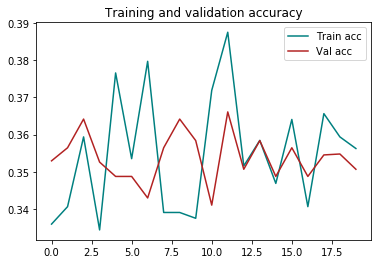

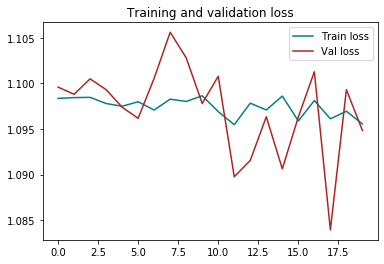

In [26]:
plot_model_sum(hist_5)

In [27]:
# Fit_generator function
# more steps_per_epoch 
hist_steps = base.fit_generator(generator=train_g,
                            steps_per_epoch=50,
                            epochs=20, 
                            validation_data=val_g,
                            validation_steps=val_g.samples // batch_size)
#50 /150

Epoch 1/20
50/50 [==============================] - 191s 4s/step - loss: 1.0958 - accuracy: 0.3692 - val_loss: 1.0880 - val_accuracy: 0.3566
Epoch 2/20
50/50 [==============================] - 183s 4s/step - loss: 1.0978 - accuracy: 0.3425 - val_loss: 1.1044 - val_accuracy: 0.3507
Epoch 3/20
50/50 [==============================] - 198s 4s/step - loss: 1.0964 - accuracy: 0.3619 - val_loss: 1.0968 - val_accuracy: 0.3507
Epoch 4/20
50/50 [==============================] - 199s 4s/step - loss: 1.0981 - accuracy: 0.3329 - val_loss: 1.0786 - val_accuracy: 0.3507
Epoch 5/20
50/50 [==============================] - 332s 7s/step - loss: 1.0982 - accuracy: 0.3606 - val_loss: 1.0976 - val_accuracy: 0.3661
Epoch 6/20
50/50 [==============================] - 271s 5s/step - loss: 1.0962 - accuracy: 0.3526 - val_loss: 1.0858 - val_accuracy: 0.3507
Epoch 7/20
50/50 [==============================] - 182s 4s/step - loss: 1.0982 - accuracy: 0.3506 - val_loss: 1.0926 - val_accuracy: 0.3507
Epoch 8/20
50

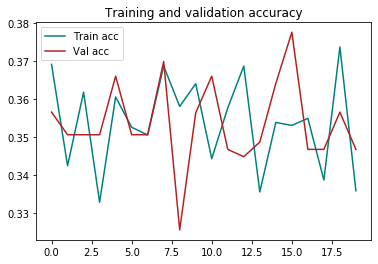

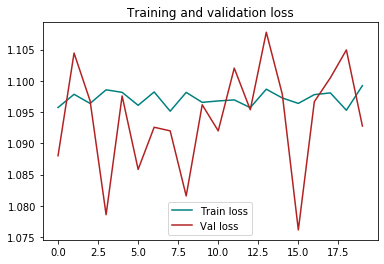

In [28]:
plot_model_sum(hist_steps)

# Evaluation

lets assumed the base model is the winning one..


In [71]:
# test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(img_dims, img_dims), 
                                                  batch_size=20, 
                                                  class_mode='categorical')

test_loss, test_acc = base.evaluate_generator(test_generator, steps=50)
print('Test acc:', test_acc)

Found 556 images belonging to 3 classes.
Test acc: 0.35140562057495117


In [73]:
# Create X and Y classes
test_images, test_labels = next(test_generator)

In [74]:
test_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

preds = base.predict(test_images)

acc = accuracy_score(test_labels, np.round(preds))*100
cm = multilabel_confusion_matrix(test_labels, np.round(preds))
cm

array([[[14,  0],
        [ 6,  0]],

       [[15,  0],
        [ 5,  0]],

       [[11,  0],
        [ 9,  0]]])

TypeError: Invalid shape (3, 2, 2) for image data

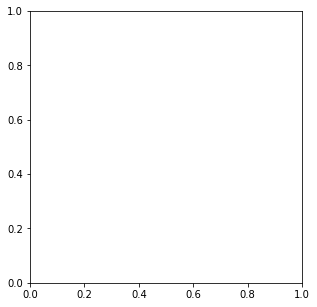

In [77]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()